In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import mglearn
import pandas as pd

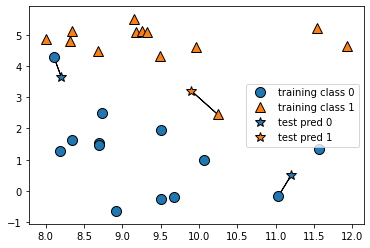

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

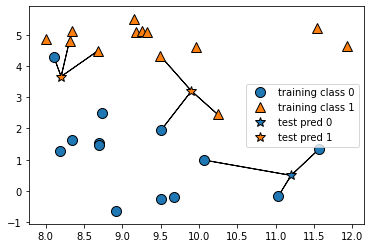

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
X_train.shape

(19, 2)

In [10]:
X_test.shape

(7, 2)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [14]:
clf.score(X_test, y_test)

0.8571428571428571

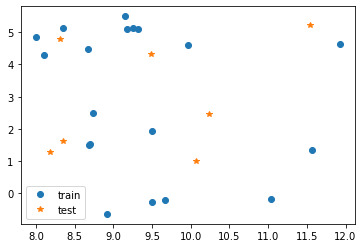

In [15]:
plt.plot(X_train[:, 0], X_train[:, 1], "o", label="train")
plt.plot(X_test[:, 0], X_test[:, 1], "*", label="test")
plt.legend()

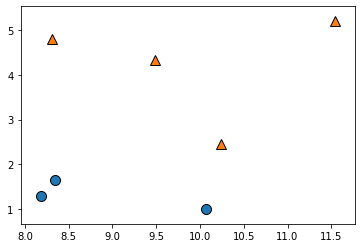

In [16]:
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


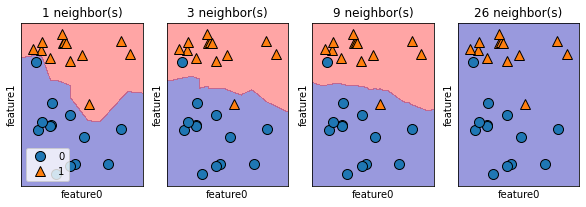

In [17]:
flg, axes = plt.subplots(1, 4, figsize=(10, 3))

print(axes)
for n, ax in zip([1, 3, 9, 26], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f'{n} neighbor(s)')
    ax.set_xlabel('feature0')
    ax.set_ylabel('feature1')
axes[0].legend(loc=3)

平滑な境界はシンプルなモデルである  
n_neighborsの数が小さすぎると複雑なモデルになっている
n_neighborsの数を訓練データの数にしてしまうと単純に訓練データのなかで多い方のクラスを出力するだけ

# モデルの複雑性と一般性の関係をがんのデータを使って調べる

In [18]:
from sklearn.datasets import load_breast_cancer

In [21]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

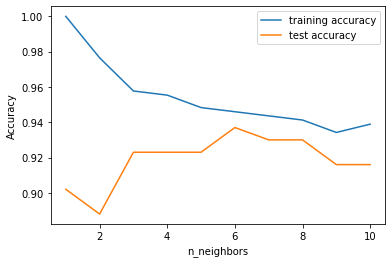

In [22]:
plt.plot(neighbors_settings, training_accuracy, label=("training accuracy"))
plt.plot(neighbors_settings, test_accuracy, label=("test accuracy"))

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

n_neighborsが小さいとモデルは複雑 (overfitting)
n_neighborsが大きすぎてもモデルは単純すぎる (underfitting)

プロットの規模感を頭の片隅に置いておくことは重要
88%でも許容されるかもしれない

# wavedata knnで回帰問題

neighborsの平均値を採用する

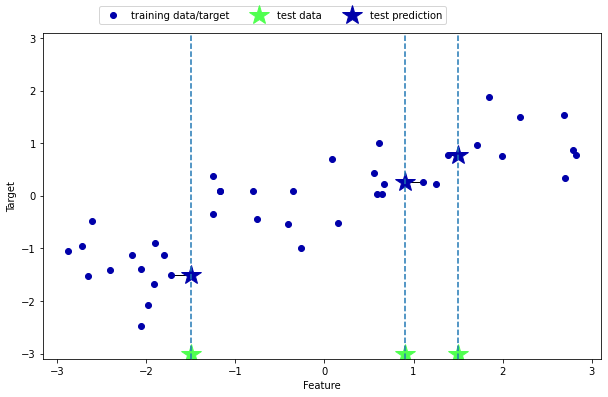

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

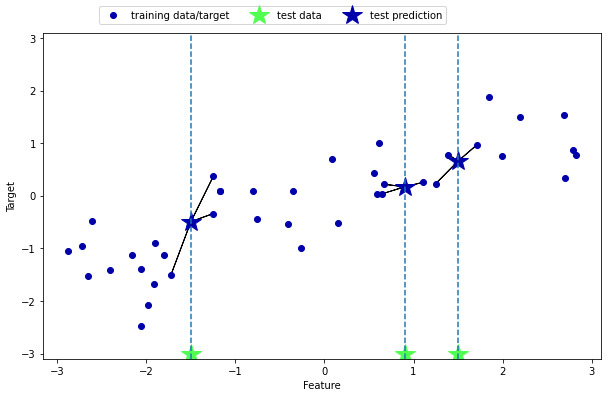

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [28]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [29]:
reg.score(X_test, y_test)

0.8344172446249605

決定係数 coefficient of determination: R^2
$$
R^2 = 1 - \frac{\mathrm{Sum}((y_{\mathrm{true}} - y_{\mathrm{pred}})^2) }{\mathrm{Sum}((y_{\mathrm{true}} - y_{\mathrm{true}}.\mathrm{mean})^2)}
$$
平均値を予測するだけのモデルと比べてどのくらい確からしい結果を出力しているか

In [40]:
from sklearn.metrics import r2_score
y_true = [2, 3, 4]
y_pred = [2, 3, 4]
r2_score(y_true, y_pred)

1.0

In [46]:
y_true = [2, 3, 4]
y_pred = [3, 3, 3] # 平均値を予測するだけのモデルは0を返す
r2_score(y_true, y_pred)

0.0

In [44]:
r2_score(y_true, y_pred, force_finite=False)

TypeError: r2_score() got an unexpected keyword argument 'force_finite'

#　取り得るすべての特徴量に対して予測する

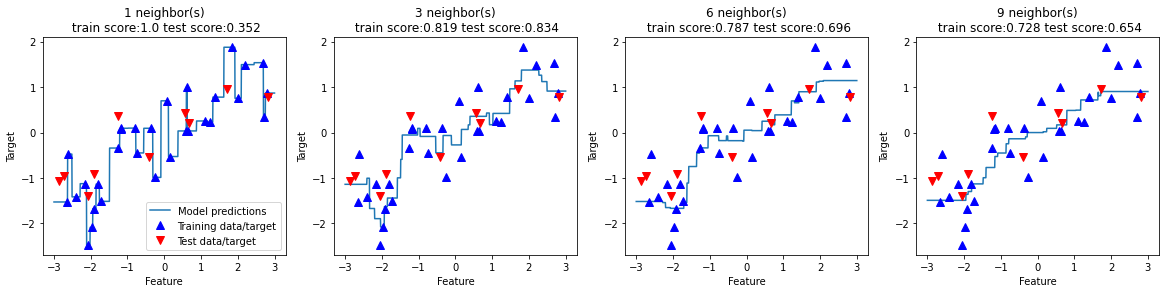

In [77]:
flg, axes = plt.subplots(1, 4, figsize=(20,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 6, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", color="b", markersize=8)
    ax.plot(X_test, y_test, "v", color="r", markersize=8)
    
    ax.set_title(
    f"{n_neighbors} neighbor(s)\n train score:{round(reg.score(X_train, y_train),3)} test score:{round(reg.score(X_test, y_test), 3)}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

In [58]:
a = np.linspace(-1, 1, 10)
print(a.reshape(-1, 1)) #-1を指定すると具体値を指定しなくてもメソッドが自動的にもう片方の数値から適当な数値を決めてくれる
a.shape

[[-1.        ]
 [-0.77777778]
 [-0.55555556]
 [-0.33333333]
 [-0.11111111]
 [ 0.11111111]
 [ 0.33333333]
 [ 0.55555556]
 [ 0.77777778]
 [ 1.        ]]


(10,)

In [57]:
print(a.reshape(1, -1))
a.shape

[[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
   0.33333333  0.55555556  0.77777778  1.        ]]


(10,)

kNeigbors における重要なパラメータ
1. n_neigbors
2. 距離の測り方  
    デフォルトではユークリッド距離
    
簡単に実装できて理解も容易いが特徴量の数やサンプル数が多くなるにつれて低速になる  

データの前処理が重要(chap3)
